# Uber Ride Data Analysis  
## Objective  
This project analyzes Uber ride data to uncover trends in ride categories, purposes, time patterns, and distances. Key goals include:  
- Identifying peak hours/days for rides.  
- Understanding the distribution of business vs. personal rides.  
- Exploring relationships between ride purpose and distance.  

**Dataset**: `UberDataset.csv` (includes columns like `START_DATE`, `CATEGORY`, `PURPOSE`, `MILES`, etc.).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
%matplotlib inline

## Data Loading  
Load the dataset and inspect the first 5 rows to understand its structure.  
Key columns:  
- `START_DATE`/`END_DATE`: Timestamps for rides.  
- `CATEGORY`: Business vs. Personal rides.  
- `PURPOSE`: Reason for the ride (e.g., "Meeting", "Customer Visit").  
- `MILES`: Distance traveled.  

In [3]:
uber=pd.read_csv("UberDataset.csv")

## Understanding the Dataset  
Let's look at the first few records to understand the structure of the dataset.  


In [4]:
uber.head(5)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


## Checking Dataset Structure  
We check the column names, data types, and missing values using `.info()`.  


In [5]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


## Data Cleaning  
**Steps**:  
1. **Remove invalid entries**: Rows marked as "Totals" are aggregated data and not individual rides.  
2. **Handle missing values**: Fill/remove nulls in `PURPOSE` (already done with `fillna("Unknown")`).  
3. **Clean location names**: Replace placeholder characters like `?` in `START`/`STOP`.  

In [6]:
uber=uber[uber["START_DATE"] !='Totals']

## Converting Date Columns  
We convert `START_DATE` and `END_DATE` to datetime format for easier analysis.  


In [7]:
uber["START_DATE"]=pd.to_datetime(uber["START_DATE"],format='mixed')

uber["END_DATE"]=pd.to_datetime(uber["END_DATE"],format='mixed')

In [8]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1155 non-null   datetime64[ns]
 1   END_DATE    1155 non-null   datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1155 non-null   float64       
 6   PURPOSE     653 non-null    object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 72.2+ KB


## Checking for Missing Values  
We check if any columns contain null values, which may require further cleaning.  


In [9]:
uber["START_DATE"].isnull().sum()

np.int64(0)

In [10]:
uber["END_DATE"].isnull().sum()

np.int64(0)

In [11]:
uber[["START_DATE","END_DATE"]]

,START_DATE,END_DATE
0,2016-01-01 21:11:00,2016-01-01 21:17:00
1,2016-01-02 01:25:00,2016-01-02 01:37:00
2,2016-01-02 20:25:00,2016-01-02 20:38:00
3,2016-01-05 17:31:00,2016-01-05 17:45:00
4,2016-01-06 14:42:00,2016-01-06 15:49:00
...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00
1151,2016-12-31 13:24:00,2016-12-31 13:42:00
1152,2016-12-31 15:03:00,2016-12-31 15:38:00
1153,2016-12-31 21:32:00,2016-12-31 21:50:00


In [12]:
uber["PURPOSE"].isnull().sum()

np.int64(502)

In [13]:
uber["PURPOSE"].fillna("Unknown",inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_17280\991531317.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  uber["PURPOSE"].fillna("Unknown",inplace=True)


In [14]:
uber['START']=uber['START'].str.replace('?','a')
uber['STOP']=uber['STOP'].str.replace('?','a')

## Feature Engineering  
**New Features**:  
- `DAY`: Day of the week (e.g., Monday).  
- `HOUR`: Hour of the day.  
- `TIME`: Categorical time of day (Morning, Afternoon, Evening, Night).  

**Why?**: These features help analyze temporal patterns in ride demand.  

In [15]:
uber["DAY"]=uber["START_DATE"].dt.day_name()

In [16]:
uber["HOUR"]=uber["START_DATE"].dt.hour

In [17]:
uber["MONTH"]=uber["START_DATE"].dt.month_name()

In [18]:
def time_category (x):
    if 5 <= x < 12:
        return "Morning"
    elif 12 <= x < 17:
        return "Afternoon"
    elif 17 <= x < 21:
        return "Evening"
    else:
        return "Night"

In [19]:
uber["TIME"]=uber["HOUR"].apply(time_category)

In [20]:
uber

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DAY,HOUR,MONTH,TIME
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Friday,21,January,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unknown,Saturday,1,January,Night
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Saturday,20,January,Evening
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Tuesday,17,January,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,Wednesday,14,January,Afternoon
...,...,...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Karachi,Karachi,0.7,Meeting,Saturday,1,December,Night
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Karachi,Unknown Location,3.9,Temporary Site,Saturday,13,December,Afternoon
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,Saturday,15,December,Afternoon
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,Saturday,21,December,Night


In [21]:
uber.isnull().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
DAY           0
HOUR          0
MONTH         0
TIME          0
dtype: int64

In [22]:
uber.duplicated().sum()

np.int64(1)

## Exploratory Data Analysis  
### Ride Distribution by Category  
**Question**: Are most rides for business or personal purposes?  
**Insight**: The bar plot below shows the dominance of business rides.  

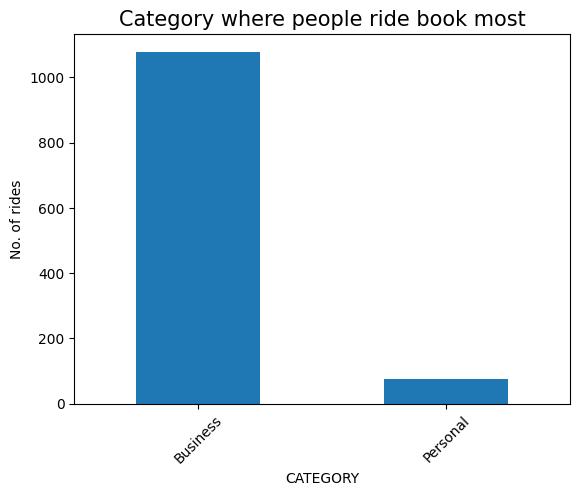

In [23]:
uber["CATEGORY"].value_counts().plot(kind="bar")
plt.xticks(rotation=45)
plt.ylabel("No. of rides")
plt.title("Category where people ride book most",size=15)
plt.show()

**Observation**:  
- **Business rides dominate**, suggesting Uber is heavily used for work-related travel.  
- Consider exploring if business rides correlate with specific purposes like "Meetings" or "Customer Visits".  

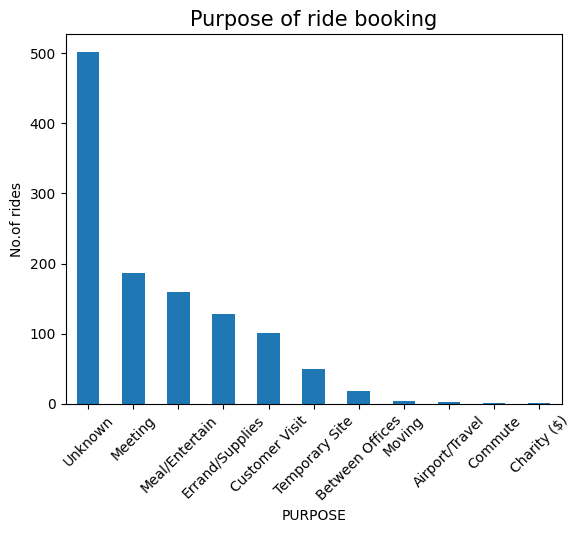

In [24]:
uber["PURPOSE"].value_counts().plot(kind="bar")
plt.xticks(rotation=45)
plt.ylabel("No.of rides")
plt.title("Purpose of ride booking",size=15)
plt.show()

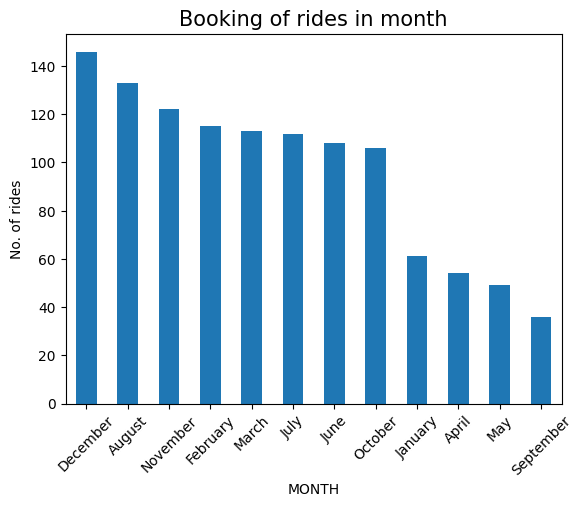

In [25]:
uber["MONTH"].value_counts().plot(kind="bar")
plt.xticks(rotation=45)
plt.ylabel("No. of rides")
plt.title("Booking of rides in month",size=15)
plt.show()

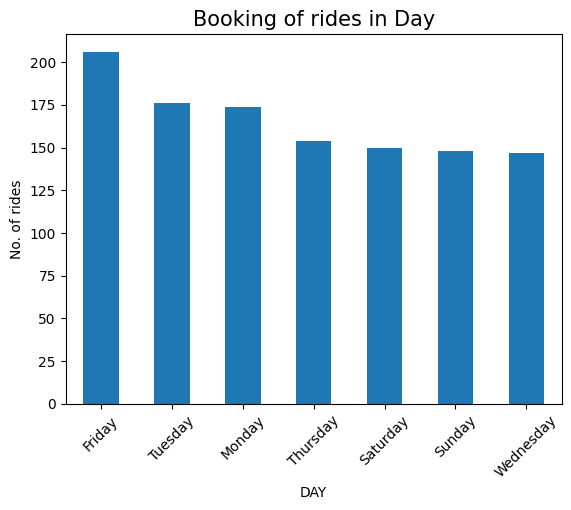

In [26]:
uber["DAY"].value_counts().plot(kind="bar")
plt.xticks(rotation=45)
plt.ylabel("No. of rides")
plt.title("Booking of rides in Day",size=15)
plt.show()

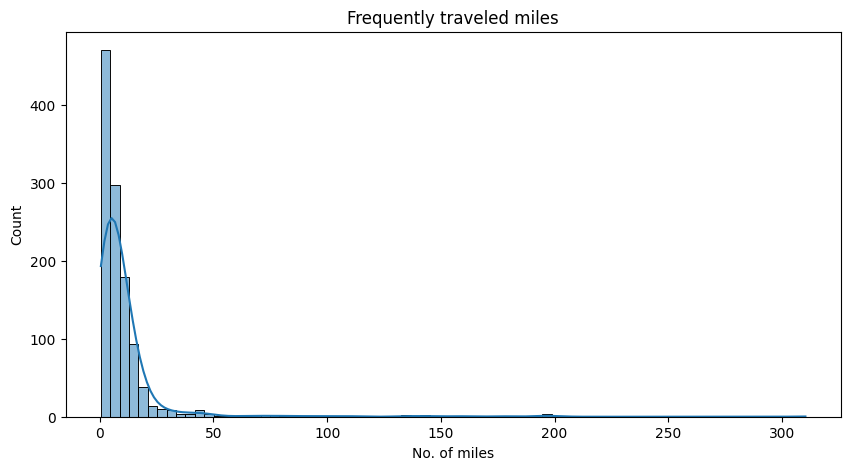

In [27]:
plt.figure(figsize=(10,5))
sns.histplot(uber["MILES"],kde=True,bins=75)
plt.xlabel("No. of miles")
plt.title("Frequently traveled miles")

plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_17280\604295555.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_duration = uber["DURATION"].resample("M").mean()


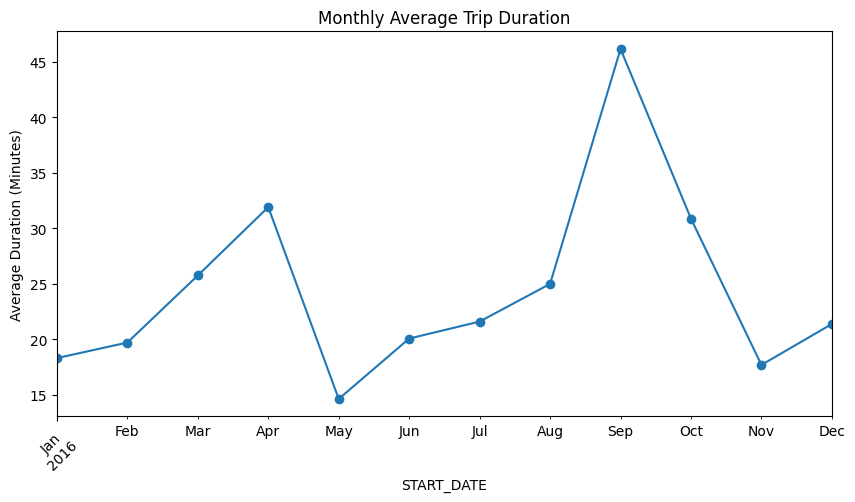

In [28]:
uber["DURATION"] = (uber["END_DATE"] - uber["START_DATE"]).dt.total_seconds()/60

plt.figure(figsize=(10,5))
uber.set_index("START_DATE", inplace=True)
monthly_duration = uber["DURATION"].resample("M").mean()
monthly_duration.plot(marker="o")
plt.ylabel("Average Duration (Minutes)")
plt.title("Monthly Average Trip Duration")
plt.xticks(rotation=45)
plt.show()


## Time Patterns  
### Rides by Hour of the Day  
**Question**: When do peak ride hours occur?  
**Insight**: The histogram below shows ride frequency by hour.  

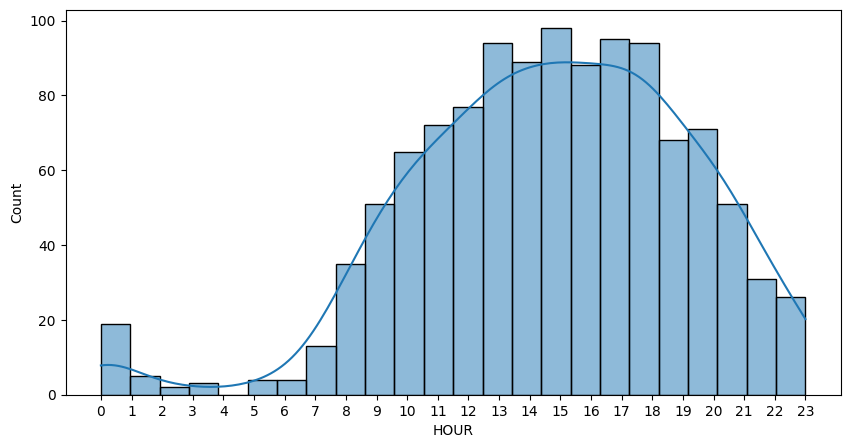

In [29]:
plt.figure(figsize=(10,5))
sns.histplot(uber['HOUR'],bins=24,kde=True)
plt.xticks(range(0,24))
plt.show()

**Observation**:  
- Peak hours: **In Evening 1PM to 6PM**.  
- Actionable: Allocate more drivers during these times to meet demand.  

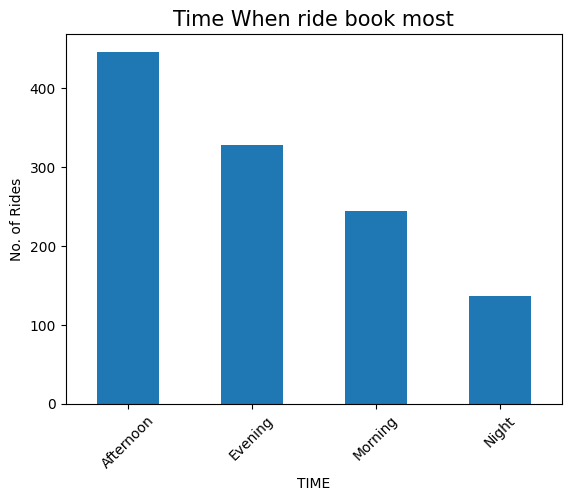

In [30]:
uber["TIME"].value_counts().plot(kind="bar")
plt.title("Time When ride book most",size=15)
plt.ylabel("No. of Rides")
plt.xticks(rotation=45)
plt.show()

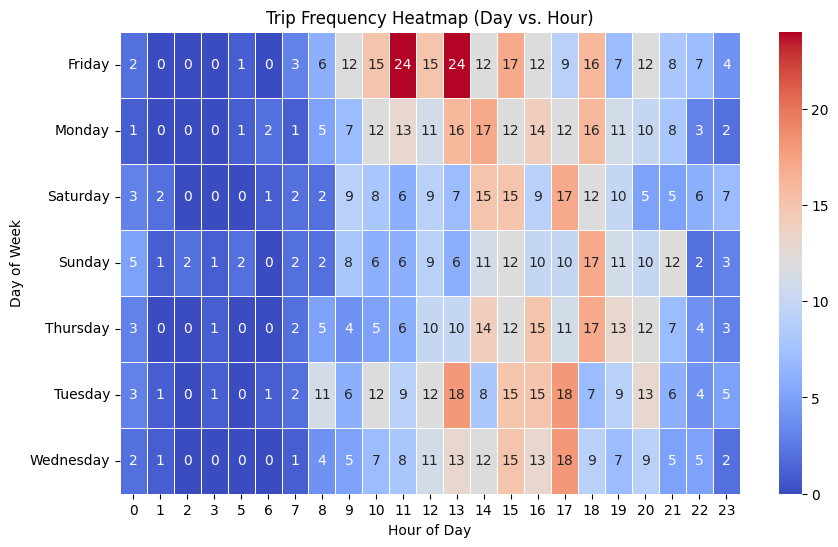

In [31]:
plt.figure(figsize=(10,6))
sns.heatmap(pd.crosstab(uber['DAY'], uber['HOUR']), cmap="coolwarm", annot=True, linewidths=0.5)
plt.title("Trip Frequency Heatmap (Day vs. Hour)")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.show()


## Ride Purpose and Distance  
**Question**: Do certain purposes involve longer distances?  
**Method**: Group data by `PURPOSE` and calculate average `MILES`.  

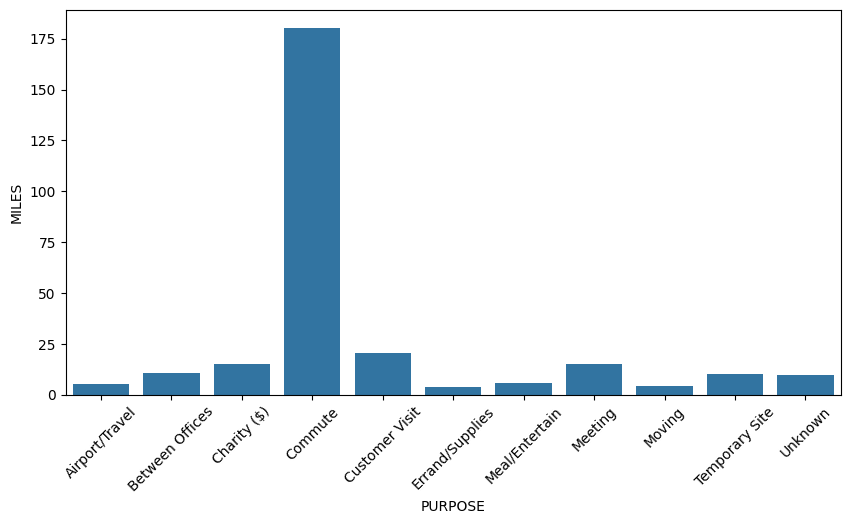

In [32]:
plt.figure(figsize=(10,5))
data=uber.groupby('PURPOSE')['MILES'].mean().reset_index()
sns.barplot(data=data,x='PURPOSE', y='MILES')
plt.xticks(rotation=45)
plt.show()

**Key Findings**:  
- Longest rides: **"Buisness/Meeting"** (avg. ~180.2 miles).  
- Shortest rides: **"Errand/Supplies"** (avg. ~3.9 miles).  

## Conclusion
This analysis of Uber ride data provides key insights into ride patterns, including peak hours, business vs. personal rides, and common ride purposes. We identified that:

- The majority of rides fall under the "Business" category.
- The most common ride purpose is "Meeting."
- Peak travel hours occur between 1 PM to 6 PM.
- The distribution of ride distances varies significantly across different purposes.
- Longest rides: **"Buisness/Meeting"** (avg. ~180.2 miles).  
- Shortest rides: **"Errand/Supplies"** (avg. ~3.9 miles).  
- Busiest day is **"Friday"**  

## improvement
- Suggest promotional strategies based on peak hours or busiest days.
- Discuss ride-sharing optimization—e.g., "Friday demand suggests surge pricing or driver incentives could improve efficiency."


